In [1]:
%matplotlib inline
import numpy as np
import scipy.sparse
import matplotlib.pyplot as plt

# The 5-point Laplacian
The function below sets up a matrix that approximates the Laplacian operator in two dimensions:

\begin{align}
\nabla^2 u = u_{xx} + u_{yy}.
\end{align}

The formula for the finite difference approximation is

\begin{align}
\nabla^2 u(x_i,y_j) \approx \frac{U_{i+1,j} + U_{i-1,j} + U_{i,j+1} + U_{i,j-1} - 4 U_{ij}}{h^2} = AU.
\end{align}

Here we construct the matrix $A$, assuming that $U$ is order row-wise.  The constant $h$ is the grid spacing (which is assumed to be the same in the $x$ and $y$ directions).  The domain is assumed to be the square $[a,b]^2$ and it is discretized using $m$ points (not counting boundary values) in each direction.

In [2]:
def five_pt_laplacian_sparse(m,a,b):
    """Construct a sparse finite difference matrix that approximates the Laplacian."""
    e=np.ones(m**2)
    e2=([1]*(m-1)+[0])*m
    e3=([0]+[1]*(m-1))*m
    h=(b-a)/(m+1)
    A=scipy.sparse.spdiags([-4*e,e2,e3,e,e],[0,-1,1,-m,m],m**2,m**2)
    A/=h**2
    A = A.todia()
    return A

In general, this matrix has the following form:

\begin{align}
  A = \frac{1}{h^2}\begin{bmatrix} T & I & & & \\ I & T & I & & \\ & I & T & I & \\ & & \ddots & \ddots & \ddots \\ & & & I & T
  \end{bmatrix}
\end{align}

where $I$ is the $m \times m$ identity matrix and $T$ is a tridiagonal $m\times m$ matrix:

\begin{align}
  T = \begin{bmatrix} -4 & 1 & & & \\ 1 & -4 & 1 & & \\ & 1 & -4 & 1 & \\ & & \ddots & \ddots & \ddots \\ & & & 1 & -4
  \end{bmatrix}
\end{align}

This structure can be seen using the `spy` function, which shows where the nonzero entries are:

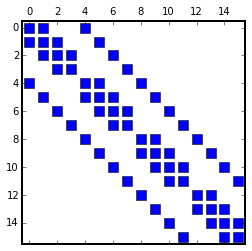

In [4]:
A = five_pt_laplacian_sparse(4,-1.,1.)
plt.spy(A)